<a href="https://colab.research.google.com/github/Abadi-kfupm/Student/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Liberaries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Dataset

In [80]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Abadi-kfupm/Student/refs/heads/main/cars_data')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [97]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [98]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


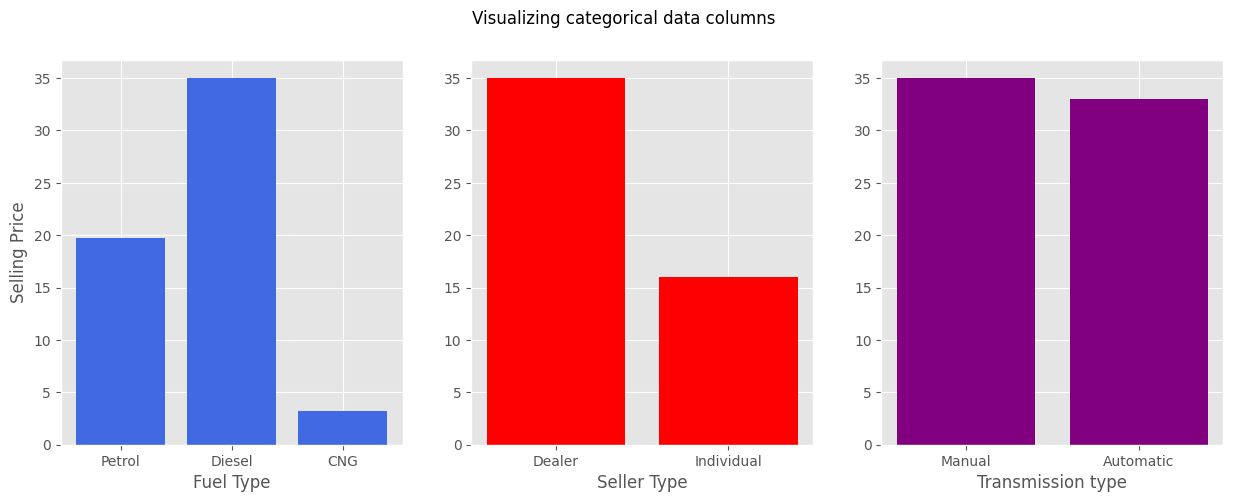

In [100]:
print(df['Car_Name'].value_counts())
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())
fuel_type = df['Fuel_Type']
seller_type = df['Seller_Type']
transmission_type = df['Transmission']
selling_price = df['Selling_Price']

from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1, 3, 1)
plt.bar(fuel_type, selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

<ipython-input-101-b1c15d034a2d>:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



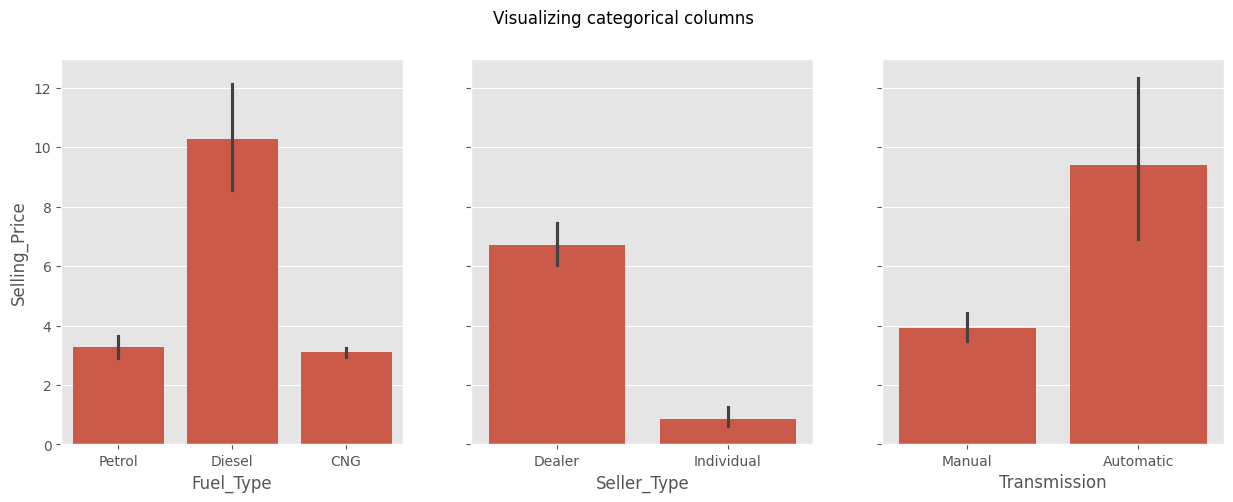

In [101]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

In [ ]:
# Distribution of Year Column

In [86]:
fig = px.histogram(df,
                   x='Year',
                   marginal='box',
                   nbins=16,
                   title='Distribution of Years')
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
# Selling Price Distribution

In [ ]:
fig = px.histogram(df,
                   x='Selling_Price',
                   marginal='box',
                   color='Transmission',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Ditribution')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Present Price Ditribution

In [87]:
fig = px.histogram(df,
                   x='Present_Price',
                   marginal='box',
                   color='Transmission',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Kilometers Driven Distribution

In [ ]:
fig = px.histogram(df,
                   x='Kms_Driven',
                   marginal='box',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [88]:
fig = px.scatter(df,
                 x='Kms_Driven',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Selling Price vs Kms Driven')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
# Selling Price vs. Year

In [89]:
fig = px.scatter(df,
                 x='Year',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Selling Price vs. Year')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(df,
                 x='Present_Price',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Selling Price vs Present Price')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
df.Selling_Price.corr(df.Year)

np.float64(0.23614098016042737)

In [ ]:
df.Selling_Price.corr(df.Present_Price)

np.float64(0.8789825451614951)

In [ ]:
df.Selling_Price.corr(df.Kms_Driven)

np.float64(0.029187090674291236)

In [91]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

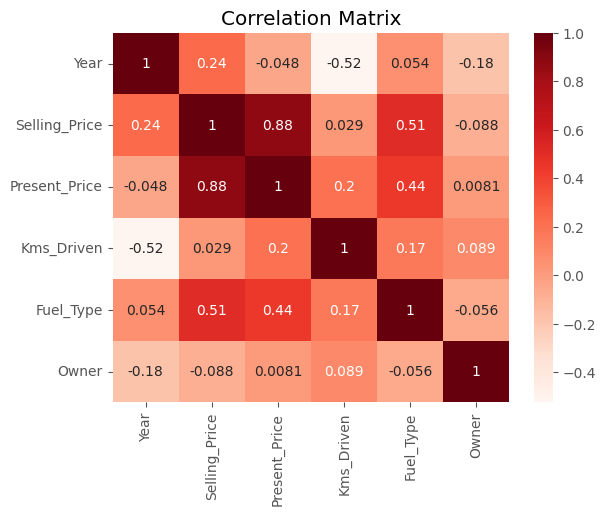

In [102]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [103]:
model = LinearRegression()

# Define inputs and outputs that will be used to train the model (i.e. determining β0 and β1)
inputs = df[['Present_Price']]
outputs = df.Selling_Price
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)
model.fit(inputs,outputs) # train the model, this method will find the best line that fits the data and minimize the error using the techniques that were disucssed above

LinearRegression()

In [113]:
# 80% Training Samples of Presnt Price
print(inputs_train)

     Present_Price
184          0.750
132          0.950
194          0.787
75           6.800
111          1.500
..             ...
188          0.570
71          12.480
106          3.450
270         10.000
102          1.780

[240 rows x 1 columns]


In [95]:
# Corrosponding (80%) Selling Prices
print(outputs_train)

184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64


In [114]:
# β1 (slope)
print(model.coef_)

# β0 (intercept)
print(model.intercept_)

[0.51684903]
0.7185274709817686


In [115]:
# 20% Presnt Price Samples To Be Tested
print(inputs_test)

     Present_Price
177           0.57
289          13.60
228           9.40
198           0.57
60           18.61
..             ...
234           5.70
296          11.60
281           7.60
285           8.50
182           0.58

[61 rows x 1 columns]


In [116]:
# Corrosponding(20%) Actual Selling Prices
print(outputs_test)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64


In [118]:
predicted_selling_price = model.intercept_ + model.coef_[0] * inputs_test

In [119]:
# Predicted Selling Price (with Regression Model)
print(predicted_selling_price)

     Present_Price
177       1.013131
289       7.747674
228       5.576908
198       1.013131
60       10.337088
..             ...
234       3.664567
296       6.713976
281       4.646580
285       5.111744
182       1.018300

[61 rows x 1 columns]


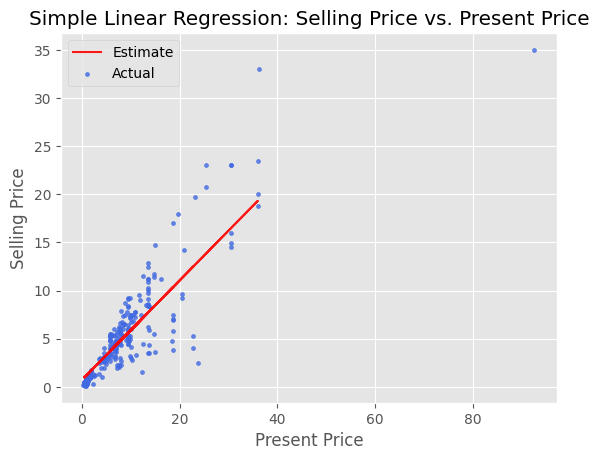

In [183]:
# Visualizing the regression line
plt.plot(inputs_test.Present_Price, predicted_selling_price, 'r', alpha=0.9)
outputs = df.Selling_Price
plt.scatter(df.Present_Price, outputs, color='royalblue', s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title("Simple Linear Regression: Selling Price vs. Present Price")
plt.legend(['Estimate', 'Actual'])


In [122]:
# Evaluating the model
mae = mean_absolute_error(outputs_test, predicted_selling_price)
rmse = np.sqrt(mean_squared_error(outputs_test, predicted_selling_price))
r2 = r2_score(outputs_test, predicted_selling_price)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1.7756517349034633
Root Mean Squared Error (RMSE): 2.674393858068127
R-squared (R2): 0.68950722731726


In [ ]:
# Multible Linear Regression

In [123]:
# Create inputs and Outputs
inputs1 = df[['Year','Present_Price','Kms_Driven']]
outputs1 = df.Selling_Price
print(inputs1)
print(outputs1)

     Year  Present_Price  Kms_Driven
0    2014           5.59       27000
1    2013           9.54       43000
2    2017           9.85        6900
3    2011           4.15        5200
4    2014           6.87       42450
..    ...            ...         ...
296  2016          11.60       33988
297  2015           5.90       60000
298  2009          11.00       87934
299  2017          12.50        9000
300  2016           5.90        5464

[301 rows x 3 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [124]:
inputs1_train, inputs1_test, outputs1_train, outputs1_test = train_test_split(inputs1, outputs1, test_size=0.2, random_state=42)
print(inputs1_train)
print(outputs1_train)

     Year  Present_Price  Kms_Driven
184  2008          0.750       26000
132  2017          0.950        3500
194  2008          0.787       50000
75   2015          6.800       36000
111  2016          1.500        8700
..    ...            ...         ...
188  2013          0.570       18000
71   2011         12.480       45000
106  2014          3.450       16500
270  2011         10.000       69341
102  2017          1.780        4000

[240 rows x 3 columns]
184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64


In [172]:
# Create and train the model
mlr_model1 = LinearRegression()
mlr_model1.fit(inputs1_train, outputs1_train)

LinearRegression()

In [173]:
# Model Coefficients and Intercept
print(mlr_model1.coef_)
print(mlr_model1.intercept_)

[ 4.43962472e-01  5.15430469e-01 -7.45847218e-07]
-893.1959328776992


In [169]:
print(inputs1_test)
print(outputs1_test)

     Year  Present_Price  Kms_Driven
177  2016           0.57       24000
289  2016          13.60       10980
228  2012           9.40       60000
198  2011           0.57       35000
60   2013          18.61       40001
..    ...            ...         ...
234  2015           5.70        4492
296  2016          11.60       33988
281  2006           7.60       50456
285  2016           8.50       15059
182  2013           0.58       30000

[61 rows x 3 columns]
177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64


In [164]:
Model1_Predect = mlr_model1.intercept_ + mlr_model1.coef_[0] * inputs1_test['Year'] + mlr_model1.coef_[1] *  inputs1_test['Present_Price'] - mlr_model1.coef_[2] * inputs1_test['Kms_Driven']
print(Model1_Predect)

177     2.144105
289     8.850454
228     4.946357
198    -0.067503
60     10.122518
         ...    
234     4.329751
296     7.836753
281     1.347689
285     6.224800
182     0.821847
Length: 61, dtype: float64


In [178]:
mae = mean_absolute_error(outputs1_test, Model1_Predect)
rmse = np.sqrt(mean_squared_error(outputs1_test, Model1_Predect))
r2 = r2_score(outputs1_test, Model1_Predect)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.3707734565579797
Root Mean Squared Error (RMSE): 2.01472601646441
R-squared (R2): 0.8237891068992329


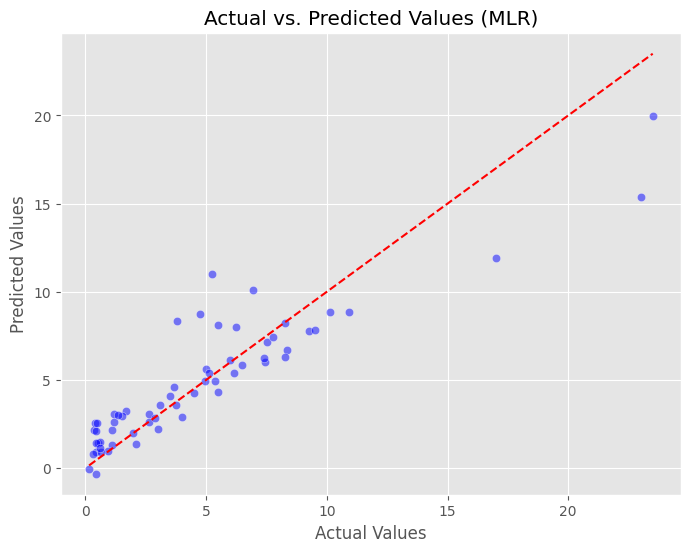

In [174]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=outputs1_test, y= Model1_Predect, color='blue', alpha=0.5)
plt.plot([outputs1_test.min(), outputs1_test.max()], [outputs1_test.min(), outputs1_test.max()], color='red', linestyle='--')  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

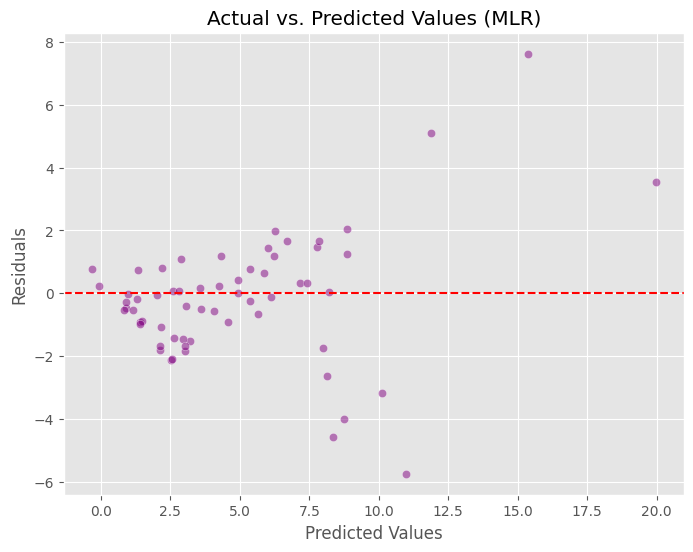

In [177]:
# Residual Plot
residuals = outputs1_test - Model1_Predect
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Model1_Predect, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

In [ ]:
# Multiple Linear Regression

In [136]:
# Create inputs and Outputs
inputs = df[['Year','Present_Price','Kms_Driven']]
outputs = df.Selling_Price

inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Create and train the model
mlr_model = LinearRegression()
mlr_model.fit(inputs_train, outputs_train)

# Model Coefficients and Intercept
print(mlr_model.coef_)
print(mlr_model.intercept_)
Model_Predect = mlr_model.intercept_ + mlr_model.coef_[0] * inputs_test['Year'] + mlr_model.coef_[1] *  inputs_test['Present_Price'] - mlr_model.coef_[2] * inputs_test['Kms_Driven']
print(Model_Predect)
print(outputs_test)

#Evaluate the model by computing RMSE
mae = mean_absolute_error(outputs1_test, Model_Predect)
rmse = np.sqrt(mean_squared_error(outputs1_test, Model_Predect))
r2 = r2_score(outputs1_test, Model_Predect)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

[ 4.43962472e-01  5.15430469e-01 -7.45847218e-07]
-893.1959328776992
177     2.144105
289     8.850454
228     4.946357
198    -0.067503
60     10.122518
         ...    
234     4.329751
296     7.836753
281     1.347689
285     6.224800
182     0.821847
Length: 61, dtype: float64
177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64
RMSE: 2.01472601646441


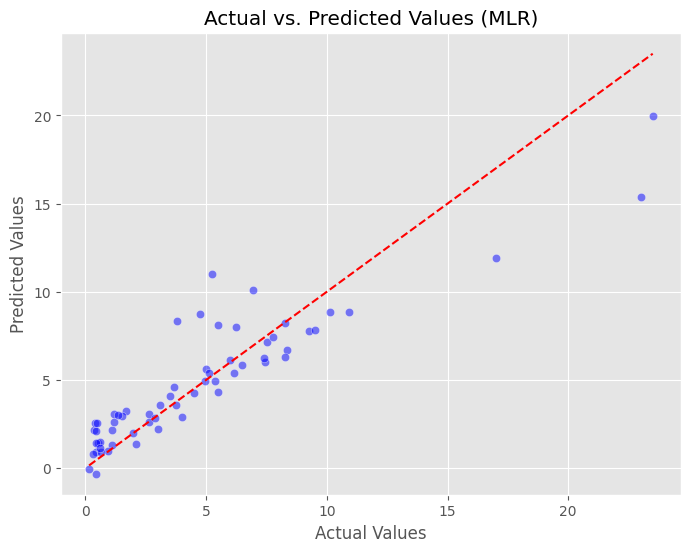

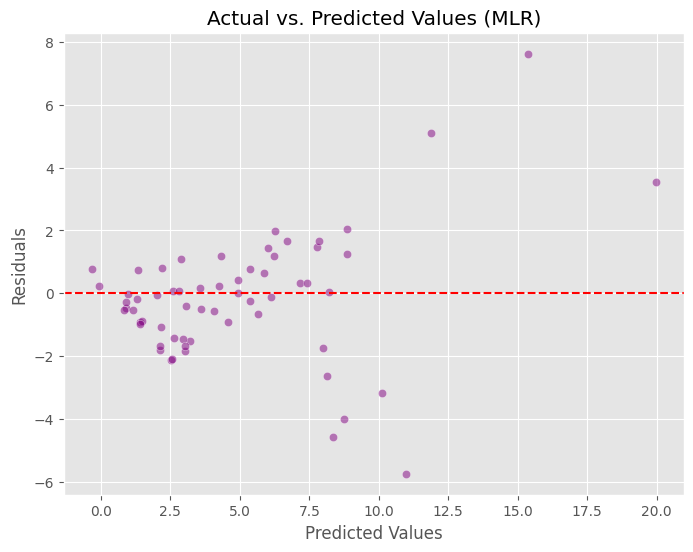

In [175]:
Model1_predect = (
    mlr_model.intercept_
    + mlr_model1.coef_[0] * inputs1_test['Year']
    + mlr_model1.coef_[1] * inputs1_test['Present_Price']
    - mlr_model1.coef_[2] * inputs1_test['Kms_Driven'])


# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=outputs1_test, y= Model1_predect, color='blue', alpha=0.5)
plt.plot([outputs1_test.min(), outputs1_test.max()], [outputs1_test.min(), outputs1_test.max()], color='red', linestyle='--')  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

# Residual Plot
residuals = outputs1_test - Model1_predect
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Model1_predect, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()


Mean Absolute Error (MAE): 1.2217615462334326
Root Mean Squared Error (RMSE): 1.87854391854287
R-squared (R²): 0.8468053957655798
               Coefficient
Year              0.363623
Present_Price     0.439942
Kms_Driven       -0.000005
Fuel_Type         1.323899
Seller_Type      -1.168669
Transmission     -1.636447
Owner            -0.920155


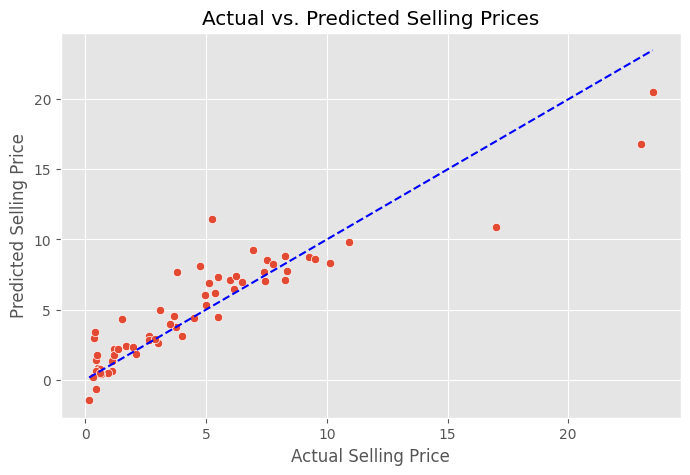

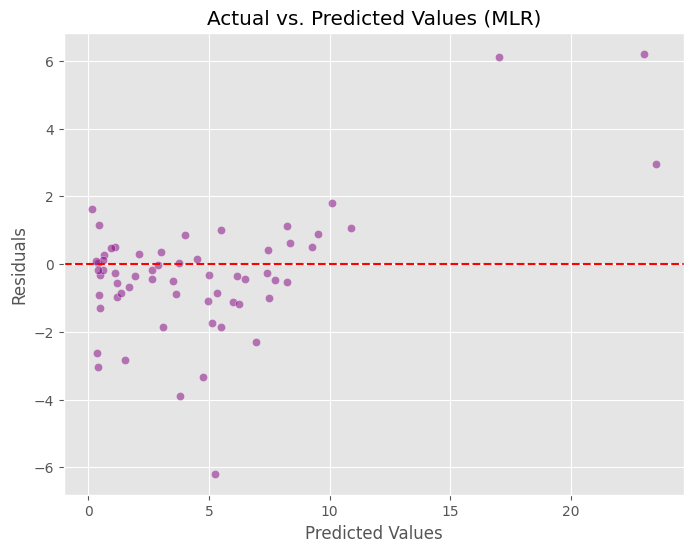

In [148]:
# Create inputs and Outputs
inputs2 = df[[
             'Year',
             'Present_Price',
             'Kms_Driven',
             'Seller_Type',
             'Fuel_Type',
             'Transmission',
             'Owner'
            ]]
outputs = df.Selling_Price

# Identify categorical columns
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
df.label_encoders = {} # Assign an empty dictionary to df.label_encoders

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder() # Create a LabelEncoder object
    df[col] = le.fit_transform(df[col])
    df.label_encoders[col] = le  # Store encoders if needed later

# Check for missing values and fill them
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predictions
Model2_Predect = mlr_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, Model2_Predect)
rmse = np.sqrt(mean_squared_error(y_test, Model2_Predect))
r2 = r2_score(y_test, Model2_Predect)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Display Coefficients
# Use mlr_model.coef_ instead of Model2_Predect.coef_
coefficients = pd.DataFrame(mlr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Scatter plot for Actual vs. Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=Model2_Predect)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')  # Identity line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()

# Residual Plot
residuals = y_test - Model2_Predect
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

In [ ]:
# Mulilinrear Regression 2

In [151]:
# Create inputs and Outputs

inputs3 = df[[
             'Year',
             'Present_Price',
             'Kms_Driven',
             'Seller_Type',
             'Fuel_Type',
             'Transmission',
             'Owner'
            ]]
outputs3 = df.Selling_Price
print(inputs3)
print(outputs3)

     Year  Present_Price  Kms_Driven  Seller_Type  Fuel_Type  Transmission  \
0    2014           5.59       27000            0          0             1   
1    2013           9.54       43000            0          1             1   
2    2017           9.85        6900            0          0             1   
3    2011           4.15        5200            0          0             1   
4    2014           6.87       42450            0          1             1   
..    ...            ...         ...          ...        ...           ...   
296  2016          11.60       33988            0          1             1   
297  2015           5.90       60000            0          0             1   
298  2009          11.00       87934            0          0             1   
299  2017          12.50        9000            0          1             1   
300  2016           5.90        5464            0          0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [152]:
inputs3_train, inputs3_test, outputs3_train, outputs3_test = train_test_split(inputs3, outputs3, test_size=0.2, random_state=42)
print(inputs3_train)
print(outputs3_train)

     Year  Present_Price  Kms_Driven  Seller_Type  Fuel_Type  Transmission  \
184  2008          0.750       26000            1          0             1   
132  2017          0.950        3500            1          0             1   
194  2008          0.787       50000            1          0             1   
75   2015          6.800       36000            0          0             1   
111  2016          1.500        8700            1          0             1   
..    ...            ...         ...          ...        ...           ...   
188  2013          0.570       18000            1          0             1   
71   2011         12.480       45000            0          1             1   
106  2014          3.450       16500            1          0             1   
270  2011         10.000       69341            0          0             1   
102  2017          1.780        4000            1          0             1   

     Owner  
184      1  
132      0  
194      0  
75       0 

In [160]:
# Create and train the model
mlr_model3 = LinearRegression()
mlr_model3.fit(inputs3_train, outputs3_train)

LinearRegression()

In [161]:
print(mlr_model3.coef_)
print(mlr_model3.intercept_)

[ 3.63622678e-01  4.39942393e-01 -5.46717653e-06 -1.16866879e+00
  1.32389894e+00 -1.63644708e+00 -9.20154941e-01]
-729.0475009952223


In [155]:
print(inputs3_test)
print(outputs3_test)

     Year  Present_Price  Kms_Driven  Seller_Type  Fuel_Type  Transmission  \
177  2016           0.57       24000            1          0             0   
289  2016          13.60       10980            0          0             1   
228  2012           9.40       60000            0          1             1   
198  2011           0.57       35000            1          0             1   
60   2013          18.61       40001            0          0             1   
..    ...            ...         ...          ...        ...           ...   
234  2015           5.70        4492            0          0             1   
296  2016          11.60       33988            0          1             1   
281  2006           7.60       50456            0          0             1   
285  2016           8.50       15059            0          0             0   
182  2013           0.58       30000            1          0             1   

     Owner  
177      0  
289      0  
228      0  
198      1 

In [ ]:
Model3_Predect = mlr_model3.intercept_ + mlr_model.coef_[0] * inputs1_test['Year'] + mlr_model.coef_[1] *  inputs1_test['Present_Price'] - mlr_model.coef_[2] * inputs1_test['Kms_Driven']
print(Model_Predect)

In [138]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Create and train the model
mlr_model = LinearRegression()
mlr_model.fit(inputs_train, outputs_train)

# Model Coefficients and Intercept
print(mlr_model.coef_)
print(mlr_model.intercept_)

predictions = mlr_model.predict(inputs_test)
Model_Predect = mlr_model.intercept_ + mlr_model.coef_[0] * inputs_test.Present_Price + mlr_model.coef_[1] * inputs_test.Year - mlr_model.coef_[2] * inputs_test.Kms_Driven
print(Model_Predect)
print(outputs)
print(predictions)
#Evaluate the model by computing RMSE
RMSE = np.sqrt(mean_squared_error(outputs_test, predictions))  # OR RMSE = np.sqrt(mean_squared_error(outputs, predictions))
print('RMSE:',RMSE)

outputs = df.Selling_Price

# Drop unnecessary columns
if 'Car_Name' in df.columns:
    df.drop(columns=['Car_Name'], inplace=True)  # Car name is categorical and non-numeric

# Identify categorical columns
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
df.label_encoders = {} # Assign an empty dictionary to df.label_encoders

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder() # Create a LabelEncoder object
    df[col] = le.fit_transform(df[col])
    df.label_encoders[col] = le  # Store encoders if needed later

# Check for missing values and fill them
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predictions
y_pred = mlr_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Display Coefficients
coefficients = pd.DataFrame(mlr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Scatter plot for Actual vs. Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Create and train the model
mlr_model = LinearRegression()
mlr_model.fit(inputs_train, outputs_train)

# Model Coefficients and Intercept
print(mlr_model.coef_)
print(mlr_model.intercept_)

predictions = mlr_model.predict(inputs_test)
Model_Predect = mlr_model.intercept_ + mlr_model.coef_[0] *input_test.Present_Price + mlr_model.coef_[1] * input_test.Year - mlr_model.coef_[2] * input_test.Kms_Driven
print(Model_Predect)
print(outputs)
print(predictions)
#Evaluate the model by computing RMSE
RMSE = np.sqrt(mean_squared_error(outputs_test, predictions))  # OR RMSE = np.sqrt(mean_squared_error(outputs, predictions))
print('RMSE:',RMSE)

ValueError: could not convert string to float: 'Bajaj Pulsar 150'

In [ ]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Create and train the model
 = LinearRegression()
mlr_model.fit(inputs_train, outputs_train)

# Model Coefficients and Intercept
print(mlr_model.coef_)
print(mlr_model.intercept_)

predictions = mlr_model.predict(inputs_test)
Model_Predect = mlr_model.intercept_ + mlr_model.coef_[0] * inputs_test.Present_Price + mlr_model.coef_[1] * inputs_test.Year - mlr_model.coef_[2] * inputs_test.Kms_Driven
print(Model_Predect)
print(outputs)
print(predictions)
#Evaluate the model by computing RMSE
RMSE = np.sqrt(mean_squared_error(outputs_test, predictions))  # OR RMSE = np.sqrt(mean_squared_error(outputs, predictions))
print('RMSE:',RMSE)
            ]]
outputs = df.Selling_Price

# Drop unnecessary columns
if 'Car_Name' in df.columns:
    df.drop(columns=['Car_Name'], inplace=True)  # Car name is categorical and non-numeric

# Identify categorical columns
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
df.label_encoders = {} # Assign an empty dictionary to df.label_encoders

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder() # Create a LabelEncoder object
    df[col] = le.fit_transform(df[col])
    df.label_encoders[col] = le  # Store encoders if needed later

# Check for missing values and fill them
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predictions
y_pred = mlr_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Display Coefficients
coefficients = pd.DataFrame(mlr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Scatter plot for Actual vs. Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Create and train the model
mlr_model = LinearRegression()
mlr_model.fit(inputs_train, outputs_train)

# Model Coefficients and Intercept
print(mlr_model.coef_)
print(mlr_model.intercept_)

predictions = mlr_model.predict(inputs_test)
Model_Predect = mlr_model.intercept_ + mlr_model.coef_[0] *input_test.Present_Price + mlr_model.coef_[1] * input_test.Year - mlr_model.coef_[2] * input_test.Kms_Driven
print(Model_Predect)
print(outputs)
print(predictions)
#Evaluate the model by computing RMSE
RMSE = np.sqrt(mean_squared_error(outputs_test, predictions))  # OR RMSE = np.sqrt(mean_squared_error(outputs, predictions))
print('RMSE:',RMSE)